## Optimisation #1 Preprocessing

**Model Optimisation Techniques Employed:**
- Adjust input data
    - Dropped additional columns
- Alternate activation functions for hidden layers
- Increased number of epochs to training regimen

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Identify columns
col=application_df.columns
col


Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [3]:
# Determine the number of unique values in each column.
unique_value_count=application_df.nunique()
unique_value_count

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Drop the non-beneficial ID columns, "EIN","NAME","AFFILIATION" & also "USE_CASE" and "SPECIAL_CONSIDERATIONS"
col_drop=["EIN","NAME","AFFILIATION","USE_CASE","SPECIAL_CONSIDERATIONS"]

application_df.drop(columns=col_drop, inplace=True)
application_df.head()

,APPLICATION_TYPE,CLASSIFICATION,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,C1000,Association,1,0,5000,1
1,T3,C2000,Co-operative,1,1-9999,108590,1
2,T5,C3000,Association,1,0,5000,0
3,T3,C2000,Trust,1,10000-24999,6692,1
4,T3,C1000,Trust,1,100000-499999,142590,1


In [5]:
# Look at APPLICATION_TYPE value counts for binning
app=application_df["APPLICATION_TYPE"].value_counts()
app

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# With the cutoff value 500 create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace=app[app<500].index.tolist()
application_types_to_replace


['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [7]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
cls=application_df["CLASSIFICATION"].value_counts()
cls

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
# Use cutoff value 1000 and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace=cls[cls<1000].index.tolist()


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE', 'CLASSIFICATION', 'ORGANIZATION', 'INCOME_AMT']

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
cat_encoded=pd.get_dummies(application_df[['APPLICATION_TYPE','CLASSIFICATION','ORGANIZATION','INCOME_AMT']])

application_df_encoded=pd.concat([application_df,cat_encoded],axis=1)
application_df_encoded=application_df_encoded.drop(columns=['APPLICATION_TYPE','CLASSIFICATION','ORGANIZATION','INCOME_AMT'])
application_df_encoded.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,108590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,6692,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1,142590,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [12]:
# Split our preprocessed data into our features and target arrays
y=application_df_encoded["IS_SUCCESSFUL"].values
X=application_df_encoded.drop("IS_SUCCESSFUL",1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\rache\AppData\Local\Temp\ipykernel_11532\1505057219.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=application_df_encoded.drop("IS_SUCCESSFUL",1).values


In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 90
hidden_nodes_layer2 = 60

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 90)                2790      
                                                                 
 dense_1 (Dense)             (None, 60)                5460      
                                                                 
 dense_2 (Dense)             (None, 1)                 61        
                                                                 
Total params: 8311 (32.46 KB)
Trainable params: 8311 (32.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=140, verbose=2)

Epoch 1/140
804/804 - 2s - loss: 0.6312 - accuracy: 0.6338 - 2s/epoch - 2ms/step
Epoch 2/140
804/804 - 1s - loss: 0.6204 - accuracy: 0.6422 - 905ms/epoch - 1ms/step
Epoch 3/140
804/804 - 1s - loss: 0.6185 - accuracy: 0.6436 - 849ms/epoch - 1ms/step
Epoch 4/140
804/804 - 1s - loss: 0.6170 - accuracy: 0.6489 - 853ms/epoch - 1ms/step
Epoch 5/140
804/804 - 1s - loss: 0.6152 - accuracy: 0.6475 - 898ms/epoch - 1ms/step
Epoch 6/140
804/804 - 1s - loss: 0.6152 - accuracy: 0.6479 - 983ms/epoch - 1ms/step
Epoch 7/140
804/804 - 1s - loss: 0.6143 - accuracy: 0.6485 - 1s/epoch - 2ms/step
Epoch 8/140
804/804 - 1s - loss: 0.6146 - accuracy: 0.6480 - 1s/epoch - 1ms/step
Epoch 9/140
804/804 - 1s - loss: 0.6141 - accuracy: 0.6489 - 937ms/epoch - 1ms/step
Epoch 10/140
804/804 - 1s - loss: 0.6135 - accuracy: 0.6473 - 915ms/epoch - 1ms/step
Epoch 11/140
804/804 - 1s - loss: 0.6134 - accuracy: 0.6492 - 900ms/epoch - 1ms/step
Epoch 12/140
804/804 - 1s - loss: 0.6129 - accuracy: 0.6493 - 1s/epoch - 1ms/step
E

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6154 - accuracy: 0.6534 - 397ms/epoch - 1ms/step
Loss: 0.6154116988182068, Accuracy: 0.6534110903739929


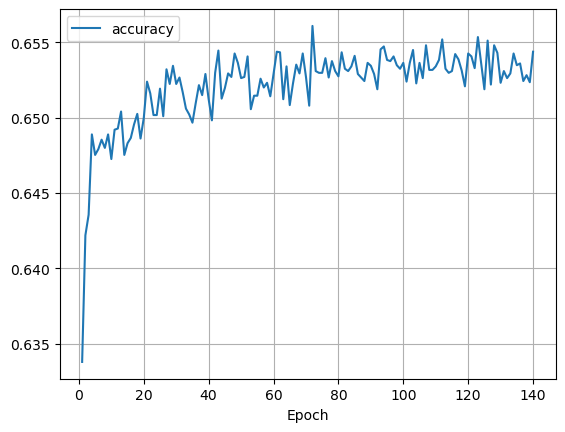

In [17]:
#create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

history_df.plot(y="accuracy")
plt.xlabel("Epoch")
plt.grid(True)
plt.show()

In [18]:
#save model to the HDF5 file
nn.save("AlphabetSoupCharity_Optimisation_1.h5")

c:\Users\rache\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
